In [38]:
library(ggtranscript)
library(dplyr)
library(readr)
library(ggplot2)

In [68]:
my_theme <- function(){ 
  font <- "Helvetica"   #assign font family up front
  greyish_col <- "#908f8f"
  theme_minimal() %+replace%    #replace elements we want to change
    
    theme(
      
      #grid elements
      panel.grid.minor = element_blank(),
      panel.grid.major = element_blank(),    #strip major gridlines
      panel.grid.minor.y =  element_line(colour = "lightgrey", linetype = 1, linewidth = 0.1),    #strip minor gridlines
      panel.grid.major.y =  element_line(colour = "lightgrey", linetype = 1, linewidth = 0.1),
      axis.line = element_line(colour = greyish_col),
      #panel.grid.major.x =  element_line(colour = "lightgrey", linetype = 1, linewidth = 0.1),
      axis.ticks = element_line(colour = greyish_col),#strip axis ticks
      
      #since theme_minimal() already strips axis lines, 
      #we don't need to do that again
      
      #text elements
      plot.title = element_text(             #title
        family = font,            #set font family
        size = 20,                #set font size
        face = 'bold',            #bold typeface
        hjust = 0,                #left align
        vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
        family = font,            #font family
        size = 14),               #font size
      
      plot.caption = element_text(           #caption
        family = font,            #font family
        size = 9,                 #font size
        hjust = 1),               #right align
      
      axis.title = element_text(             #axis titles
        family = font,            #font family
        size = 10,
        colour = greyish_col),               #font size
      
      axis.text = element_text(              #axis text
        family = font,            #axis famuly
        size = 9,
        colour = greyish_col),                #font size
      
      axis.text.x = element_text(            #margin for axis text
        margin=margin(5, b = 10))
    )
}

In [2]:
gtf_path = '/Users/fairliereese/Documents/programming/mele_lab/projects/240903_pt/data/transcripts_filt_with_gene.gtf'
gtf = rtracklayer::import(gtf_path)
gtf = gtf %>% dplyr::as_tibble()


In [81]:
df = read.table('241021_pi_counts_table_long.tsv', sep='\t', header=1)

In [96]:
plot_transcript_structure_tids <- function(df, gtf, tids) {
  
  # Filter df for the given gid and sample, and sort by t_tpm in descending order
  temp <- df 
  
  # Filter gtf for the extracted tids and keep only exon entries
  temp_gtf <- gtf %>%
    subset(transcript_id %in% tids & type == 'exon')
  
  # Apply shorten_gaps function
  temp_gtf_shortened <- shorten_gaps(
    exons = temp_gtf, 
    introns = to_intron(temp_gtf, "transcript_id"), 
    group_var = "transcript_id"
  )
  
  # Separate shortened exons and introns
  temp_gtf_shortened_exons <- temp_gtf_shortened %>% dplyr::filter(type == "exon") 
  temp_gtf_shortened_introns <- temp_gtf_shortened %>% dplyr::filter(type == "intron") 
  
  # Plot original transcript structure
  plot1 <- temp_gtf %>%
    ggplot(aes(
        xstart = start,
        xend = end,
        y = transcript_id
    )) +
    geom_range() +
    geom_intron(
        data = to_intron(temp_gtf, "transcript_id"),
        aes(strand = strand)
    )+my_theme()
  
  # Plot shortened transcript structure
  plot2 <- temp_gtf_shortened_exons %>% 
    ggplot(aes(
        xstart = start,
        xend = end,
        y = transcript_id
    )) +
    geom_range() +
    geom_intron(
        data = temp_gtf_shortened_introns,
        aes(strand = strand), 
        arrow.min.intron.length = 300
    )+my_theme()
  
  # Return both plots
  list(original_plot = plot1, shortened_plot = plot2)
}

In [91]:
plot_transcript_structure <- function(df, gtf, curr_gid, curr_sample) {
  
  # Filter df for the given gid and sample, and sort by t_tpm in descending order
  temp <- df %>%
    subset(gid == curr_gid & sample == curr_sample & t_tpm > 0) %>%
    arrange(desc(t_tpm))
  
  # Extract the tids
  tids <- temp %>% pull(tid)
  
  # Filter gtf for the extracted tids and keep only exon entries
  temp_gtf <- gtf %>%
    subset(transcript_id %in% tids & type == 'exon')
  
  # Apply shorten_gaps function
  temp_gtf_shortened <- shorten_gaps(
    exons = temp_gtf, 
    introns = to_intron(temp_gtf, "transcript_id"), 
    group_var = "transcript_id"
  )
  
  # Separate shortened exons and introns
  temp_gtf_shortened_exons <- temp_gtf_shortened %>% dplyr::filter(type == "exon") 
  temp_gtf_shortened_introns <- temp_gtf_shortened %>% dplyr::filter(type == "intron") 
  
  # Plot original transcript structure
  plot1 <- temp_gtf %>%
    ggplot(aes(
        xstart = start,
        xend = end,
        y = transcript_id
    )) +
    geom_range() +
    geom_intron(
        data = to_intron(temp_gtf, "transcript_id"),
        aes(strand = strand)
    )+my_theme()
  
  # Plot shortened transcript structure
  plot2 <- temp_gtf_shortened_exons %>% 
    ggplot(aes(
        xstart = start,
        xend = end,
        y = transcript_id
    )) +
    geom_range() +
    geom_intron(
        data = temp_gtf_shortened_introns,
        aes(strand = strand), 
        arrow.min.intron.length = 300
    )+my_theme()
  
  # Return both plots
  list(original_plot = plot1, shortened_plot = plot2)
}

$original_plot

$shortened_plot


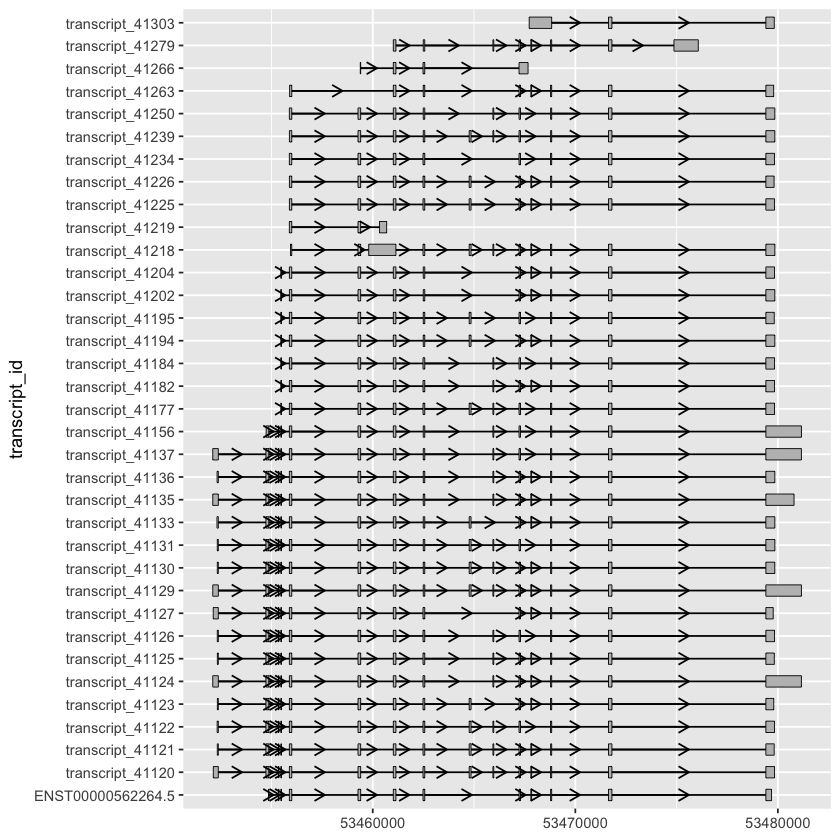

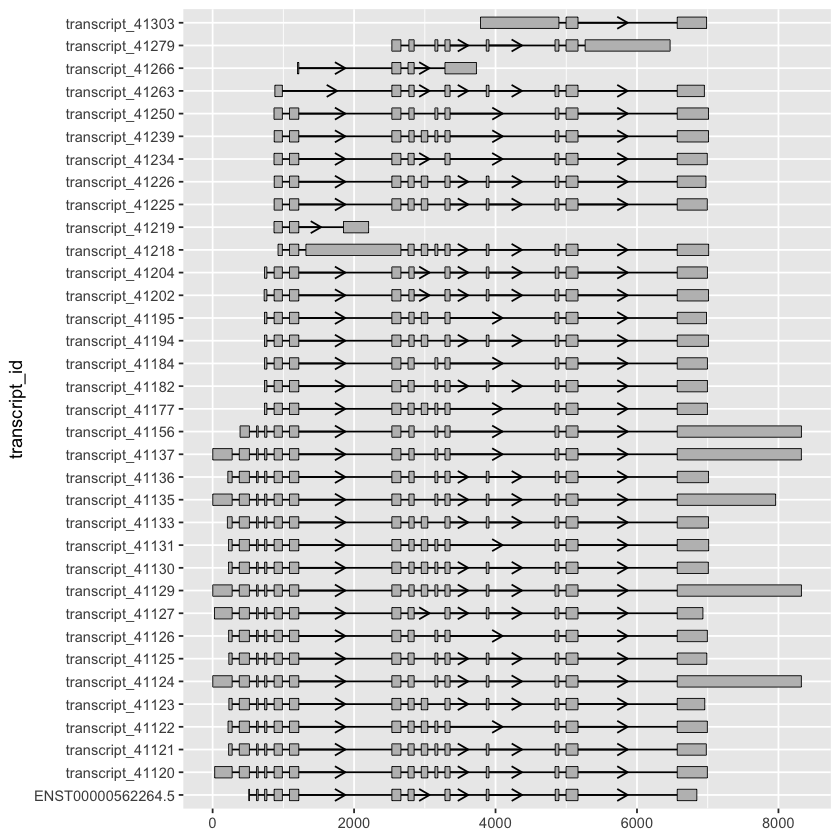

In [83]:
curr_gid='ENSG00000197111.16'
curr_sample='AJI5'
plot_transcript_structure(df, gtf, gid, sample)


$original_plot

$shortened_plot


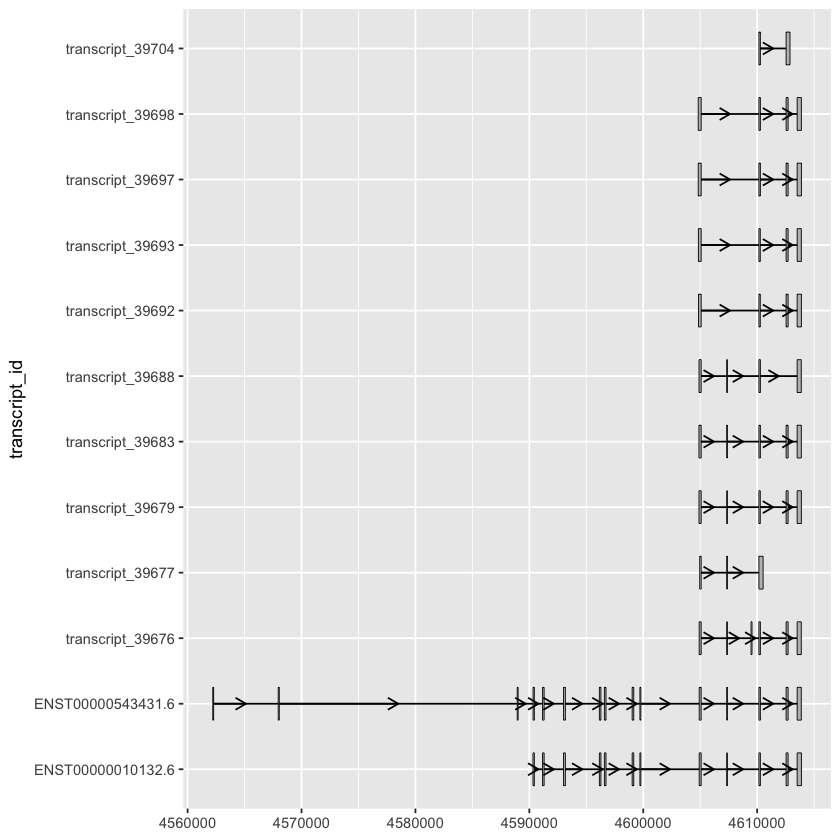

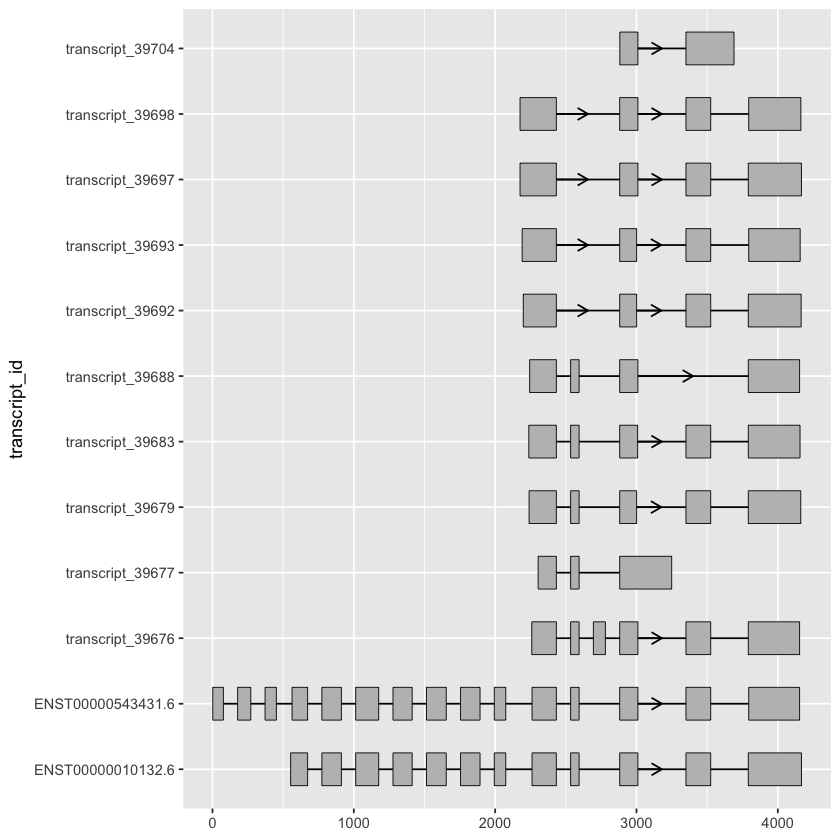

In [84]:
# Example usage
plot_transcript_structure(df, gtf, "ENSG00000010219.14", "ITU3")


$original_plot

$shortened_plot


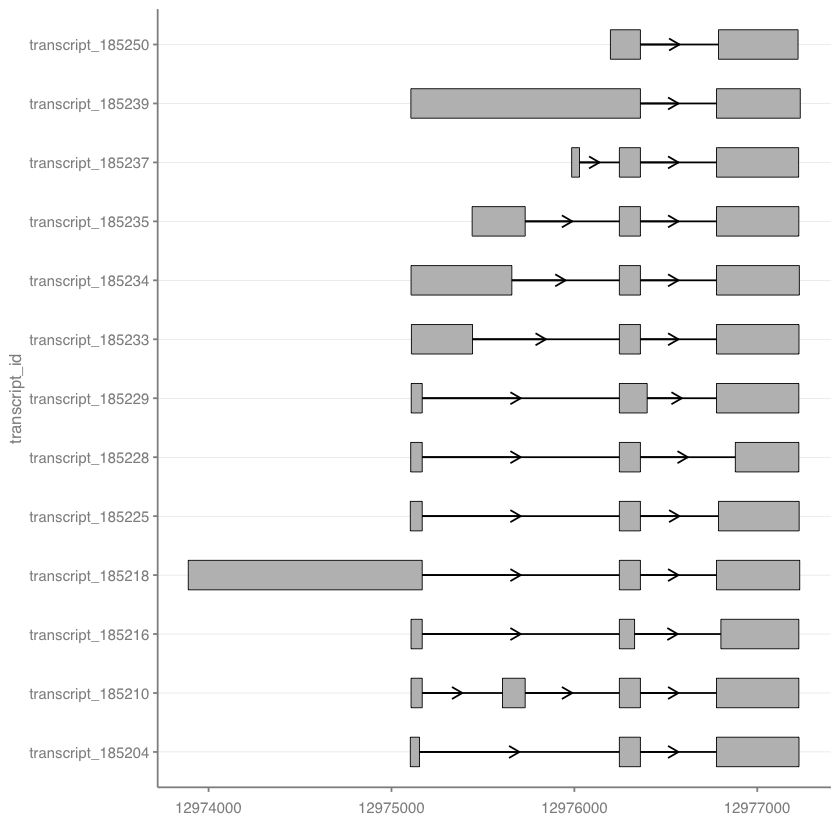

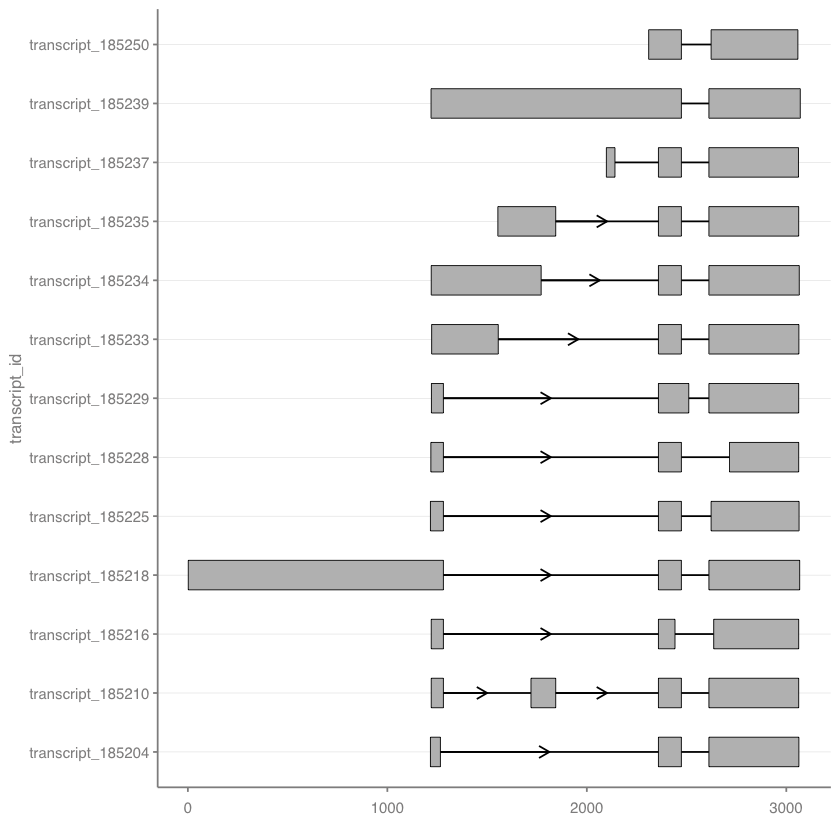

In [92]:
gid = curr_gid= 'ENSG00000205542.11'
sample=curr_sample='CEU4'
plot_transcript_structure(df, gtf, gid, sample)
temp <- df %>%
subset(gid == curr_gid & sample == curr_sample & t_tpm > 0) %>%
arrange(desc(t_tpm))

$original_plot

$shortened_plot


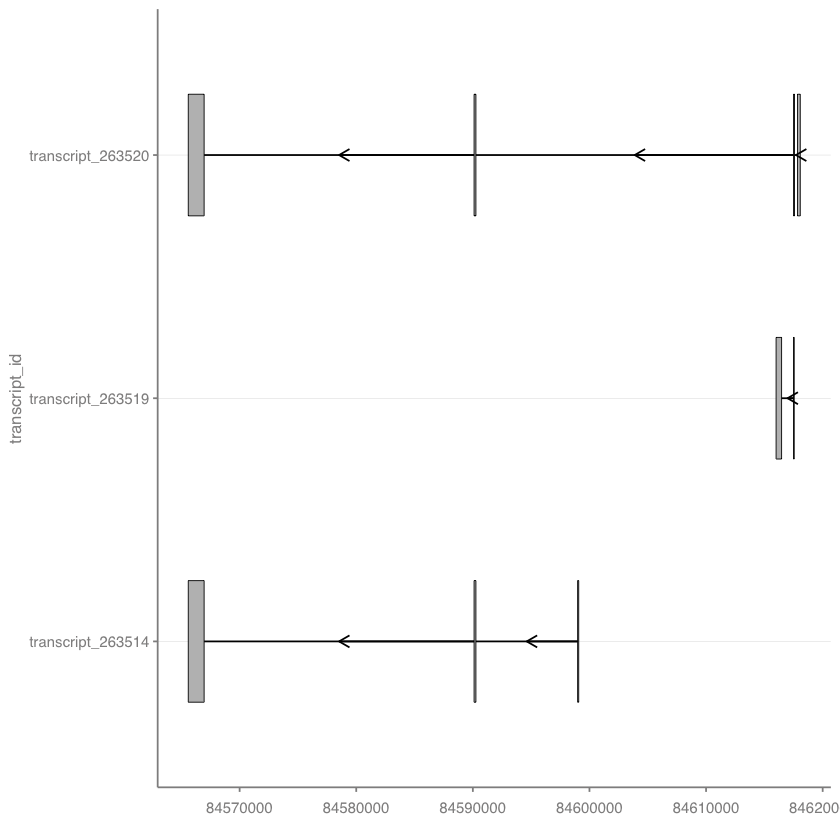

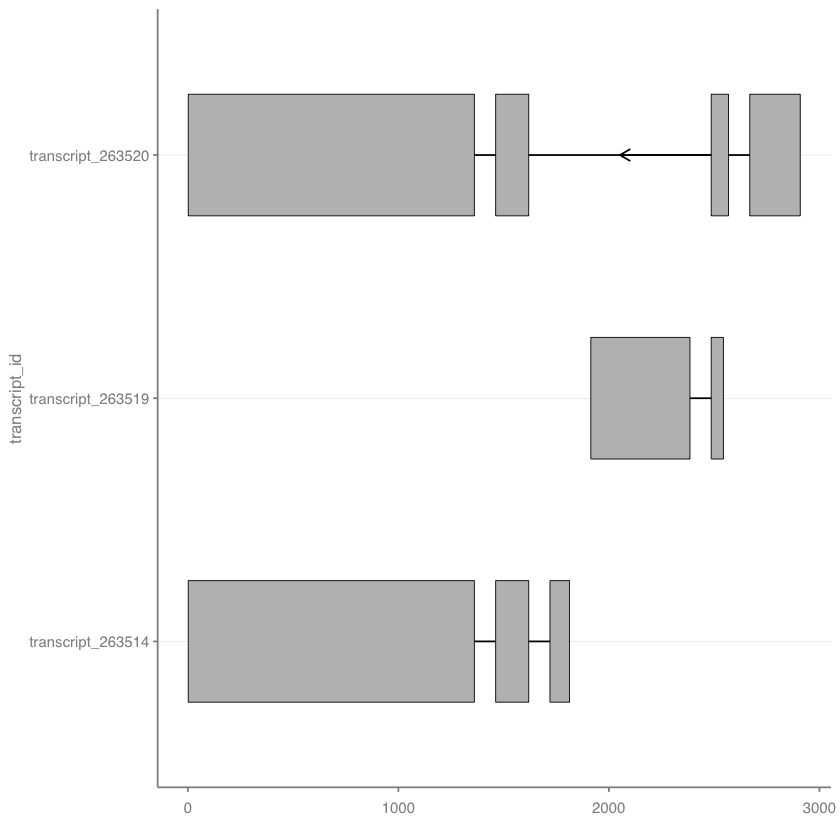

In [93]:
gid = 'ENSG00000103187.8'
sample = 'PEL3'
plot_transcript_structure(df, gtf, gid, sample)


$original_plot

$shortened_plot


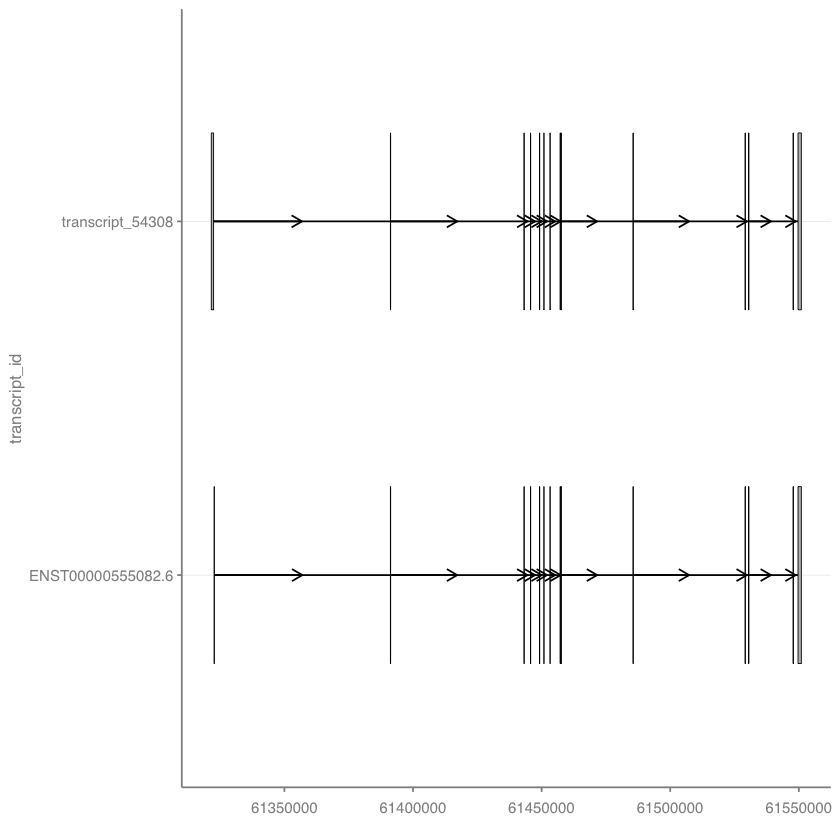

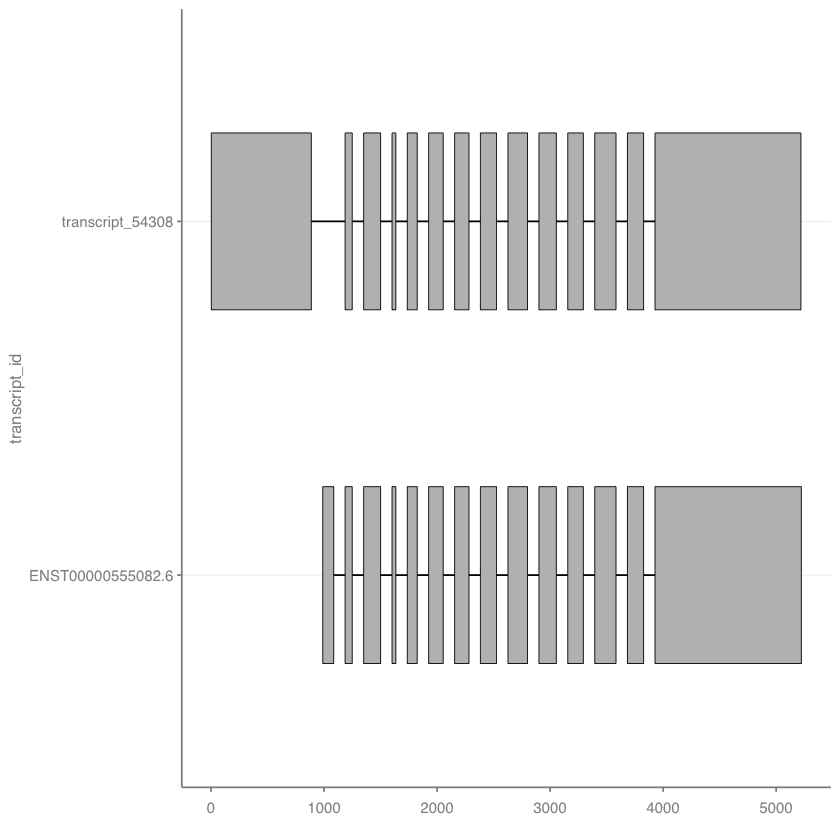

In [94]:
gid = 'ENSG00000027075.18'
sample = 'CEU2'
plot_transcript_structure(df, gtf, gid, sample)


$original_plot

$shortened_plot


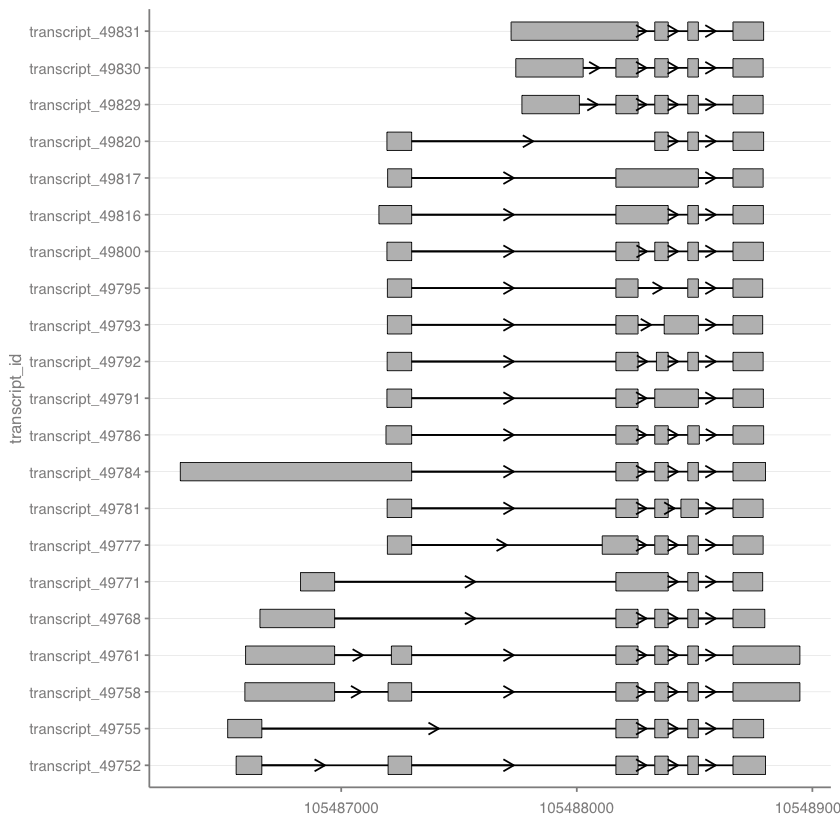

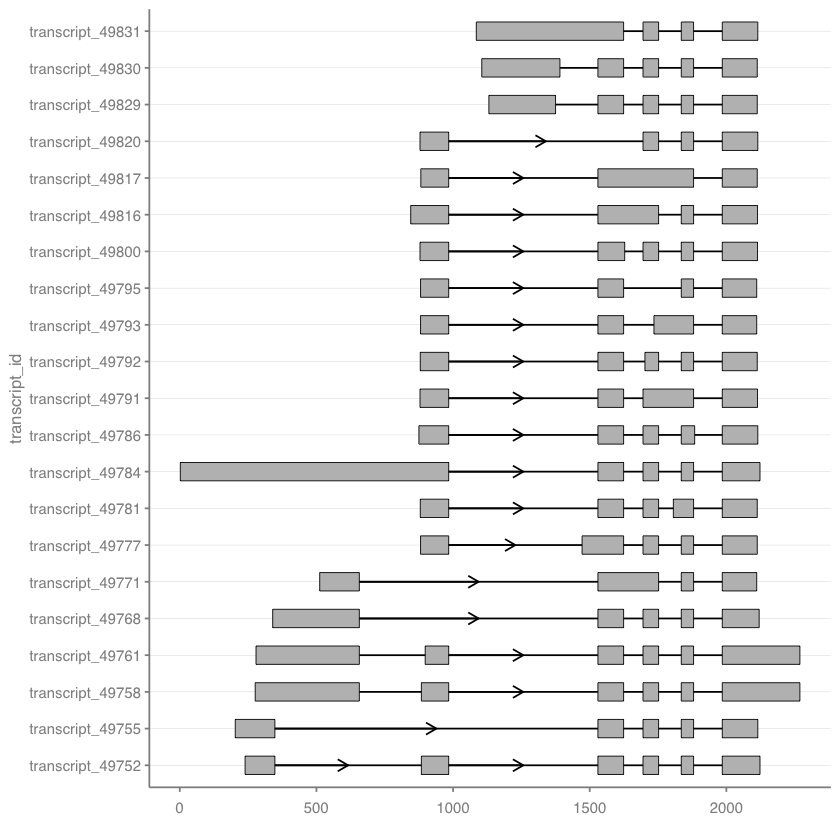

In [95]:
gid = 'ENSG00000213145.10'
pop1 = 'CEU2'
plot_transcript_structure(df, gtf, gid, sample)


$original_plot

$shortened_plot


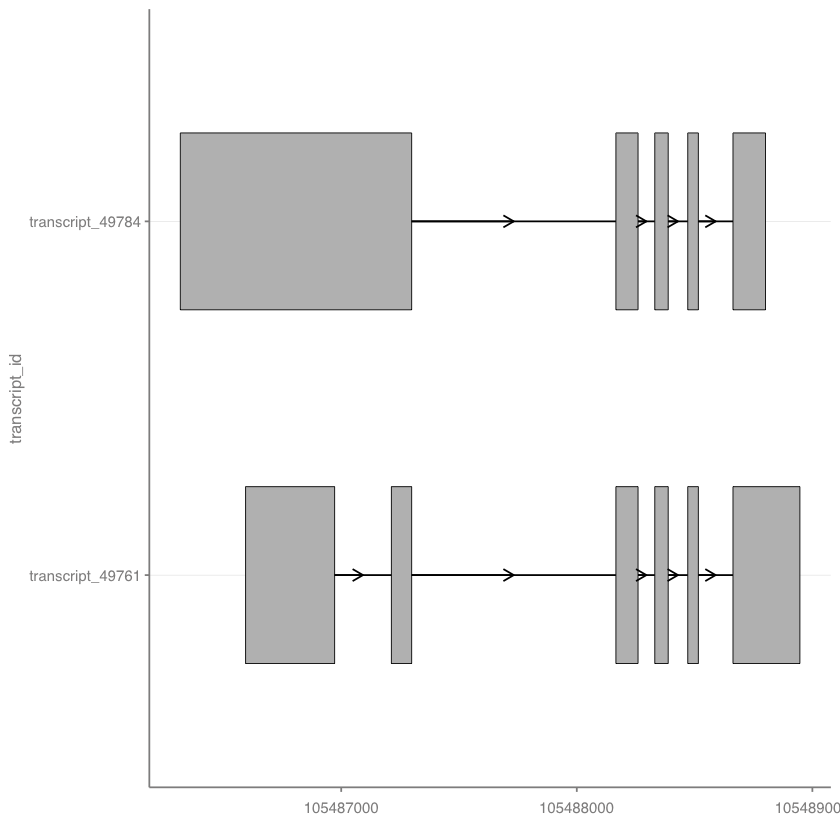

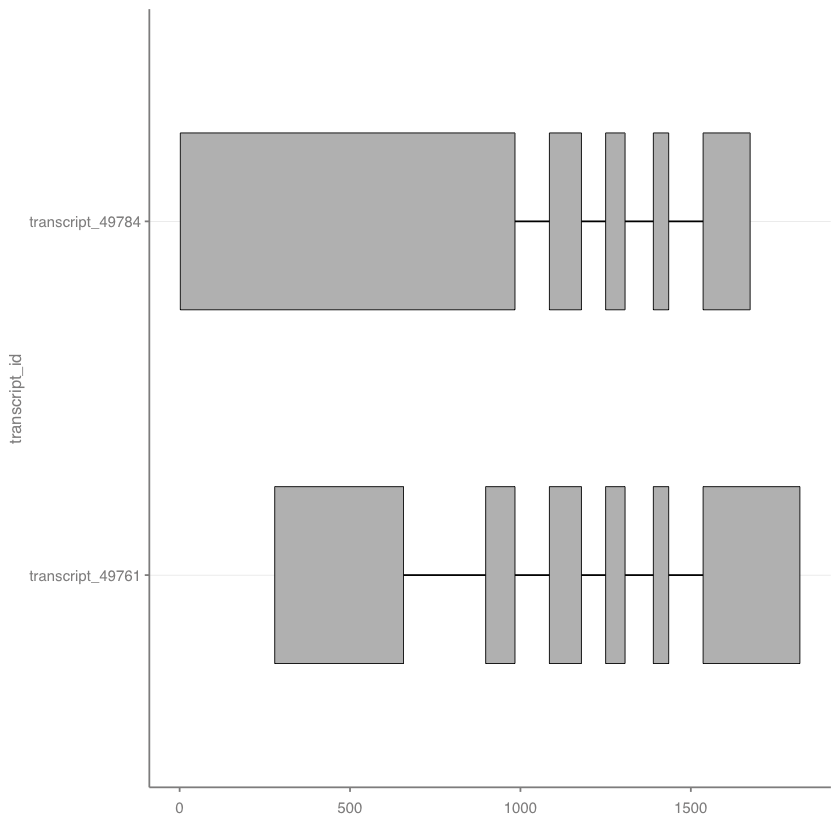

In [98]:
tids = c('transcript_49761', 'transcript_49784')
plot_transcript_structure_tids(df, gtf, tids)


$original_plot

$shortened_plot


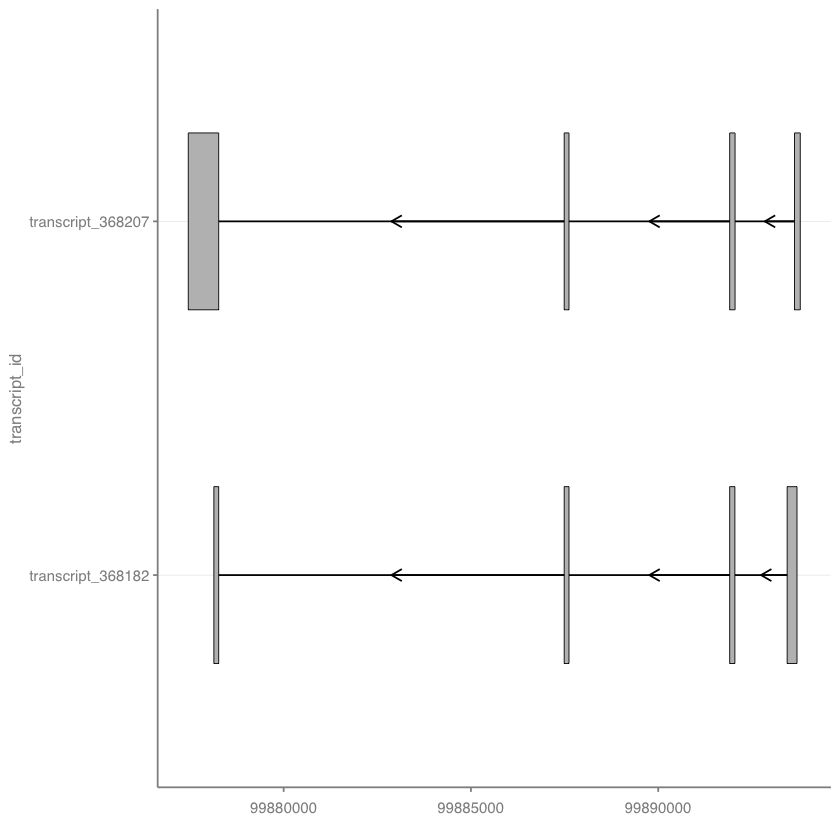

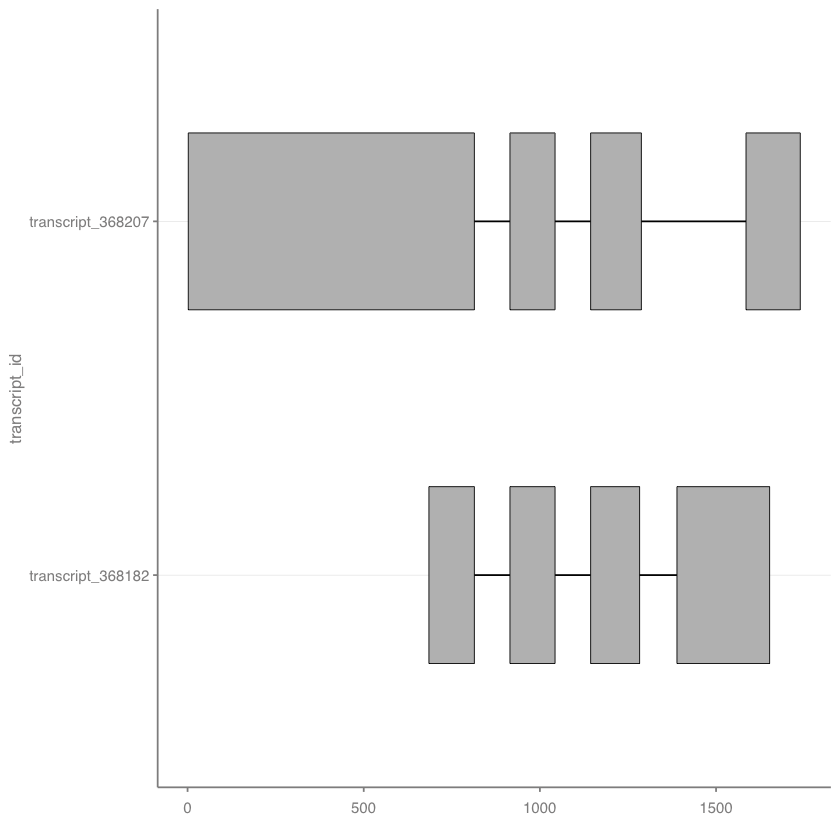

In [99]:
tids = c('transcript_368207', 'transcript_368182')
plot_transcript_structure_tids(df, gtf, tids)
